# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | cable beach
City not found. Skipping...
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | lisala
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | dubovka
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | nadym
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | polyarnyy
Processing Record 12 of Set 1 | takum
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | saint-jorioz
Processing Record 15 of Set 1 | vallenar
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | ponta delgada
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | igarka
Processing Record 21 of Set 1 | sumbe
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | ndjole
Processing Record 40 of Set 4 | sampit
Processing Record 41 of Set 4 | zhezqazghan
Processing Record 42 of Set 4 | seeb
Processing Record 43 of Set 4 | uturoa
Processing Record 44 of Set 4 | weno
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | mao
Processing Record 47 of Set 4 | badger
Processing Record 48 of Set 4 | balfour
Processing Record 49 of Set 4 | yokadouma
Processing Record 0 of Set 5 | dickinson
Processing Record 1 of Set 5 | bawku
Processing Record 2 of Set 5 | mazagao
Processing Record 3 of Set 5 | jamestown
Processing Record 4 of Set 5 | karratha
Processing Record 5 of Set 5 | lagos
Processing Record 6 of Set 5 | mombetsu
Processing Record 7 of Set 5 | rostovka
Processing Record 8 of Set 5 | aykhal
Processing Record 9 of Set 5 | hithadhoo
Processing Record 10 of Set 5 | port alfred
Processing Record 11 of Set 5 | chiili
City not found. Skipping...
Processing Record 12 of Set 5 | gantang
Processing Reco

Processing Record 33 of Set 8 | tshikapa
Processing Record 34 of Set 8 | barcelos
Processing Record 35 of Set 8 | hamilton
Processing Record 36 of Set 8 | kuching
Processing Record 37 of Set 8 | helsinki
Processing Record 38 of Set 8 | tamanrasset
Processing Record 39 of Set 8 | rongelap
Processing Record 40 of Set 8 | saint-philippe
Processing Record 41 of Set 8 | tambopata
Processing Record 42 of Set 8 | xique xique
Processing Record 43 of Set 8 | belur
Processing Record 44 of Set 8 | dakoro
Processing Record 45 of Set 8 | turinsk
Processing Record 46 of Set 8 | lodja
Processing Record 47 of Set 8 | vila velha
Processing Record 48 of Set 8 | el bauga
Processing Record 49 of Set 8 | katsuura
Processing Record 0 of Set 9 | hobyo
Processing Record 1 of Set 9 | bogo
Processing Record 2 of Set 9 | wenatchee
Processing Record 3 of Set 9 | itaituba
Processing Record 4 of Set 9 | aldinga beach
Processing Record 5 of Set 9 | kodiak
Processing Record 6 of Set 9 | coquimbo
Processing Record 7 o

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.11,76,91,9.01,TF,1697565212
1,east london,-33.0153,27.9116,18.52,82,0,6.69,ZA,1697565213
2,hawaiian paradise park,19.5933,-154.9731,24.94,78,0,3.60,US,1697565213
3,lisala,2.1500,21.5167,25.41,73,85,0.37,CD,1697565213
4,keflavik,64.0049,-22.5624,10.24,93,100,13.89,IS,1697565213


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.11,76,91,9.01,TF,1697565212
1,east london,-33.0153,27.9116,18.52,82,0,6.69,ZA,1697565213
2,hawaiian paradise park,19.5933,-154.9731,24.94,78,0,3.60,US,1697565213
3,lisala,2.1500,21.5167,25.41,73,85,0.37,CD,1697565213
4,keflavik,64.0049,-22.5624,10.24,93,100,13.89,IS,1697565213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

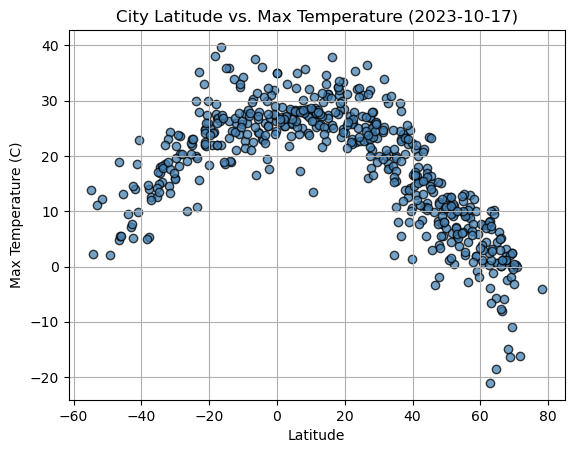

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"] , marker="o" , facecolor="steelblue" , edgecolor="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-10-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

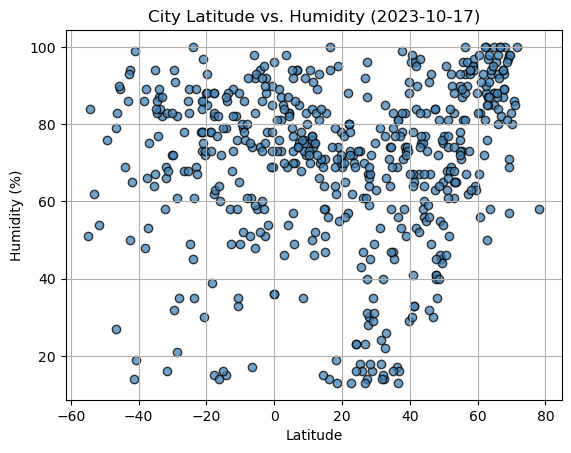

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"] , marker="o" , facecolor="steelblue" , edgecolor="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

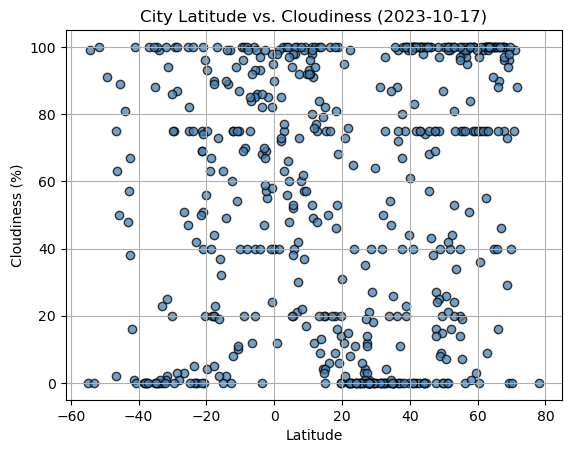

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"] , marker="o" , facecolor="steelblue" , edgecolor="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

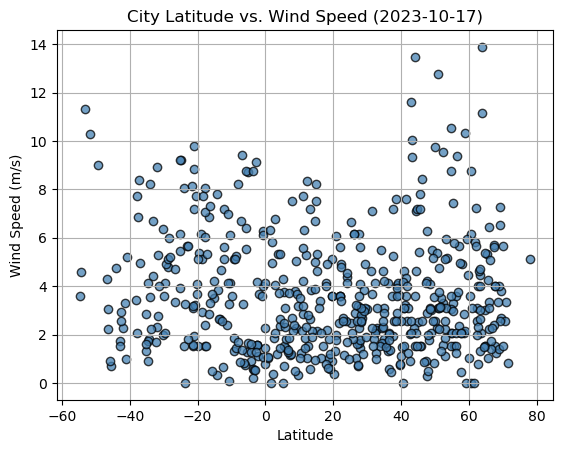

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"] , marker="o" , facecolor="steelblue" , edgecolor="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def linear_regression():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_data = x_values * slope + intercept
    plt.scatter(x_values, y_values, color="steelblue", edgecolor="black", alpha=0.75)
    plt.plot(x_values, line_data, color="red")
    line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize = 15, color = "red")
    print(f"The r-value is: {rvalue}")


In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hawaiian paradise park,19.5933,-154.9731,24.94,78,0,3.60,US,1697565213
3,lisala,2.1500,21.5167,25.41,73,85,0.37,CD,1697565213
4,keflavik,64.0049,-22.5624,10.24,93,100,13.89,IS,1697565213
5,dubovka,49.0583,44.8290,10.29,45,9,5.51,RU,1697565214
7,nadym,65.5333,72.5167,6.33,96,100,5.34,RU,1697565214


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.11,76,91,9.01,TF,1697565212
1,east london,-33.0153,27.9116,18.52,82,0,6.69,ZA,1697565213
6,puerto ayora,-0.7393,-90.3518,31.98,85,98,4.02,EC,1697565214
11,waitangi,-43.9535,-176.5597,9.57,69,81,4.77,NZ,1697565215
13,vallenar,-28.5708,-70.7581,23.66,21,87,4.80,CL,1697565216


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8733835482662116


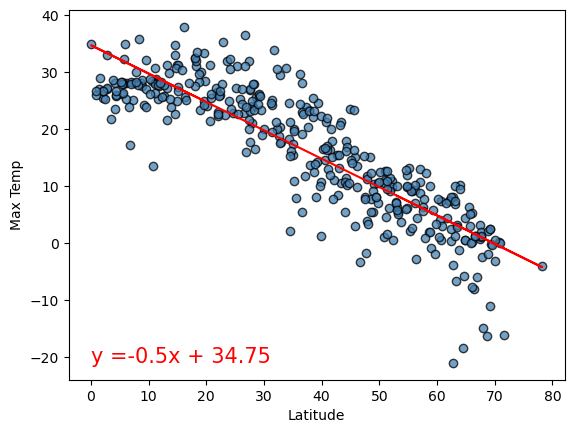

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.7398917445118904


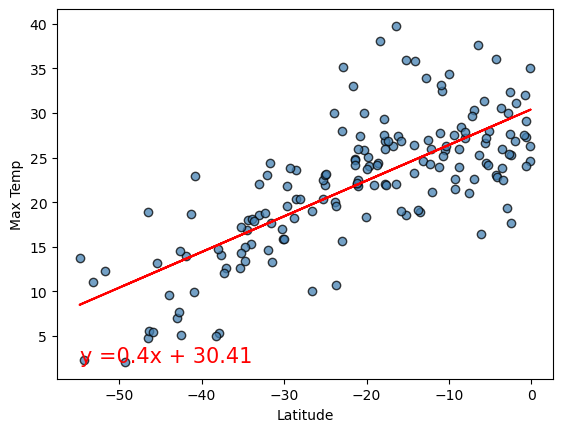

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere plot shows the relationship between ascending latitude and max temperature for the cities respresented. The r-value of -0.87 shows a strong relationship between the drop in temperature and the rise in latitude which logically makes sense as we approach a polar region. The southern hemisphere data shows a similar relationship, though in the inverse. With a r-value of 0.73, we see a strong relationship between a rise in temperatures as we approach the equator, which makes sense as we again come from a polar region and move towards the warm equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23663056428097062


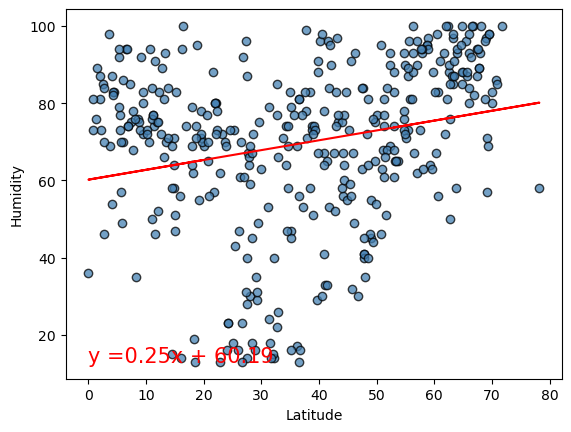

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.033843719376404235


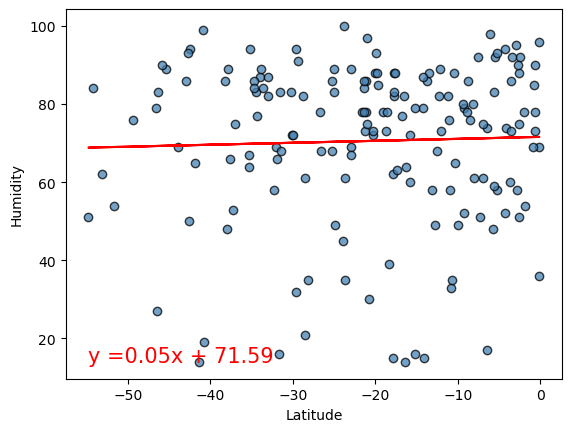

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20608025824253948


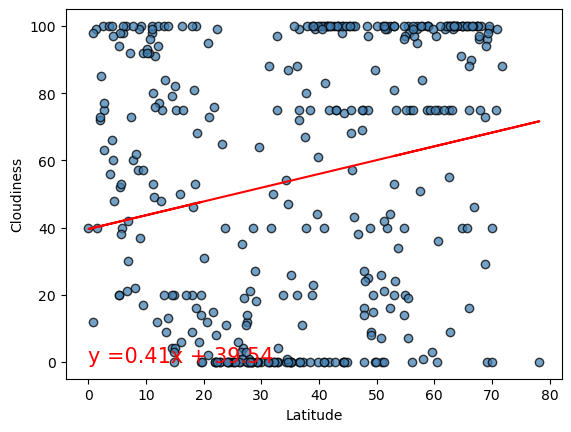

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.23861716390823234


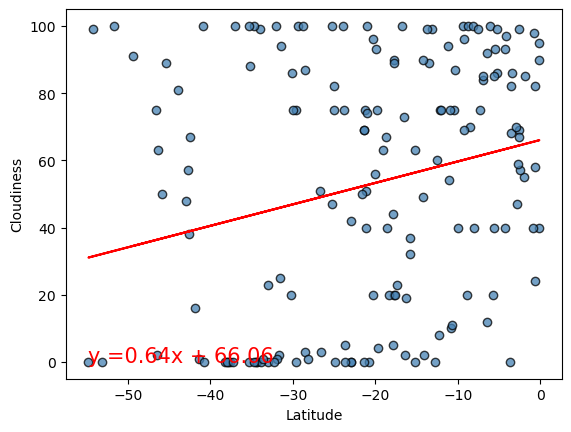

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13631493620685947


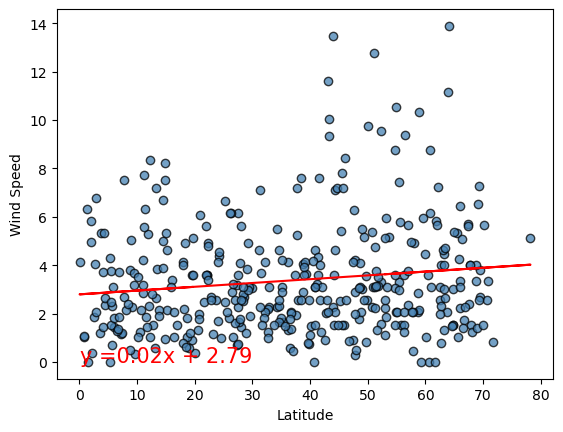

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.13077787360941084


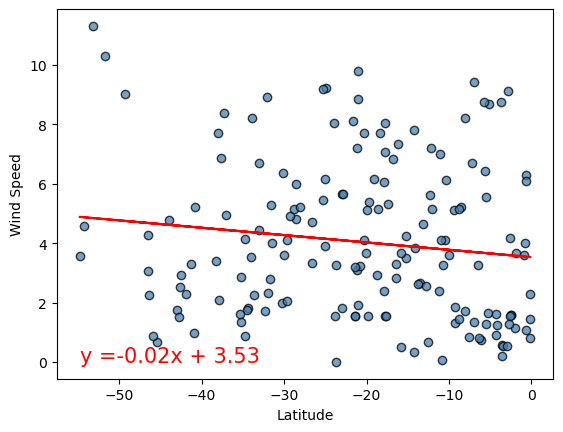

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE